In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/emotions.csv")
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   word     141530 non-null  object
 1   emotion  141530 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


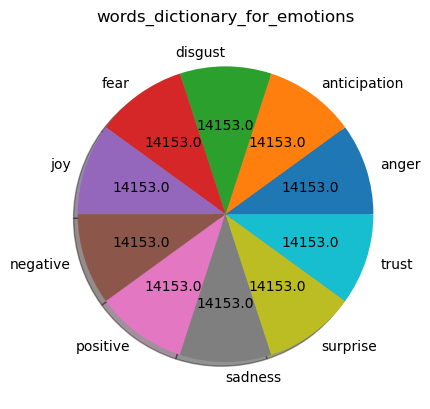

In [2]:
import matplotlib.pyplot as plt
value_count = data.emotion.value_counts().values
emotions = data.emotion.unique()

def absolute_value(val):
    a  = np.round(val/100.*value_count.sum(), 0)
    return a

plt.pie(value_count, labels = emotions,autopct=absolute_value, shadow=True)
plt.title("words_dictionary_for_emotions")
plt.show() 

In [3]:
import fasttext

load_model has the actual path of the model downloaded : fasttext English model trained on wikiPedia and Common Crawl

In [4]:
wiki_model = fasttext.load_model("../../cc.en.300.bin")

In [5]:
dir(wiki_model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_labels',
 '_words',
 'f',
 'get_analogies',
 'get_dimension',
 'get_input_matrix',
 'get_input_vector',
 'get_label_id',
 'get_labels',
 'get_line',
 'get_meter',
 'get_nearest_neighbors',
 'get_output_matrix',
 'get_sentence_vector',
 'get_subword_id',
 'get_subwords',
 'get_word_id',
 'get_word_vector',
 'get_words',
 'is_quantized',
 'labels',
 'predict',
 'quantize',
 'save_model',
 'set_args',
 'set_matrices',
 'test',
 'test_label',
 'words']

In [6]:
type(wiki_model.get_word_vector("joy"))

numpy.ndarray

In [7]:
data['word_vector'] = data.word.apply(lambda x : wiki_model.get_word_vector(x))

In [8]:
data.word_vector[0]

array([ 1.25809340e-02, -3.05245025e-03,  2.83139162e-02,  6.72656745e-02,
       -1.28814131e-01, -7.47175515e-02,  2.69607417e-02, -5.60932755e-02,
       -3.09758373e-02,  4.36817072e-02,  3.63150761e-02,  1.16478167e-02,
       -5.12624793e-02,  3.44901383e-02, -4.28270549e-03,  1.74576114e-03,
        4.99642268e-02,  4.91789058e-02, -7.01101795e-02, -2.15329304e-02,
       -4.66941949e-03,  4.55785356e-02, -7.63258664e-03,  4.20393497e-02,
       -1.20191863e-02,  6.39683334e-03, -1.58740804e-02, -8.44307430e-03,
       -1.26385419e-02,  6.83712885e-02, -1.74478423e-02,  2.64029503e-02,
        1.53016741e-03,  6.25974759e-02,  1.25083253e-02, -6.47845119e-02,
        6.22098856e-02, -5.16007356e-02, -3.87753993e-02, -7.75386691e-02,
       -3.94174755e-02,  1.58152543e-02,  9.29948129e-03, -7.24322274e-02,
       -3.96546349e-02,  8.97088181e-03, -2.96331346e-02, -5.21539599e-02,
        5.08532673e-02,  2.48392820e-02,  1.54715758e-02, -1.20711010e-02,
       -7.09197447e-02,  

In [9]:
from sklearn.cluster import AffinityPropagation



# creating a dataframe for storing generated subemotions and corresponding vector
subemotion_df = pd.DataFrame(columns = ['subemotions', 'avg_vector'])

# iterate over all emotions and perform clustering...
for emotion in emotions :
    arr = np.stack(data.word_vector.values[data.emotion == emotion])[:2000] # specify number here --<
    af = AffinityPropagation().fit(arr)
    cluster_labels = af.labels_
    
# get the centroids for each cluster...
    centroids = af.cluster_centers_
    array_1d_list = [vec for vec in centroids]
    
    sub_emo = np.arange(len(centroids))
    sub_emotion_arr = np.array([ emotion + '_' + str(i) for i in sub_emo])
    
    data_frame = pd.DataFrame({'subemotions': sub_emotion_arr, 'avg_vector':array_1d_list })
    subemotion_df = pd.concat([subemotion_df,data_frame] , sort = False, ignore_index=True)



In [10]:
subemotion_df

,subemotions,avg_vector
0,anger_0,"[-0.024723701, 0.014913883, -0.0075197383, 0.0..."
1,anger_1,"[0.04734125, -0.0303966, -0.0571129, 0.1087578..."
2,anger_2,"[-0.043776985, -0.05426109, 0.016261984, 0.019..."
3,anger_3,"[0.16783153, 0.078796595, 0.047290646, 0.15111..."
4,anger_4,"[0.06312309, -0.08286121, -0.0060587786, 0.045..."
...,...,...
3795,trust_377,"[-0.01693631, 0.052772716, -0.011024304, 0.097..."
3796,trust_378,"[-0.13130577, -0.010610122, -0.011988234, 0.07..."
3797,trust_379,"[-0.2533133, -0.011042722, -0.12888199, -0.015..."
3798,trust_380,"[0.03369911, -0.0074228835, -0.00069329474, 0...."
